<a href="https://colab.research.google.com/github/Seemab-zakir/Seemab-zakir-Covid-Diagnosis-from-CT-images/blob/main/Diagnosis_of_Covid_CT_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/UCSD-AI4H/COVID-CT.git"

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 35.20 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [ ]:
!unzip -q "/content/COVID-CT/Images-processed/CT_COVID.zip"

In [ ]:
!unzip -q "/content/COVID-CT/Images-processed/CT_NonCOVID.zip"

In [ ]:
!mkdir Extracting_folder

In [ ]:
import shutil
shutil.move( "CT_COVID",'/content/Extracting_folder')
shutil.move( "CT_NonCOVID",'/content/Extracting_folder')


'/content/Extracting_folder/CT_NonCOVID'

In [ ]:
#import libraries
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ModelCheckpoint
#from keras import backend as K
from keras.optimizers import Adam,RMSprop

In [ ]:
image_shape = (224,224,3)


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    validation_split=0.3)

In [ ]:
#load the training data
train_generator = datagen.flow_from_directory('/content/Extracting_folder',
    target_size=image_shape[0:2],
    batch_size=100,
    class_mode='binary',
    subset='training')

Found 523 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory('/content/Extracting_folder',
    target_size=image_shape[0:2],
    batch_size=5,
    class_mode='binary',
    subset='validation')

Found 223 images belonging to 2 classes.


In [ ]:
for batch in train_generator:
    print(batch)
    break;




(array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.13333334, 0.13333334, 0.13333334],
         [0.41176474, 0.41176474, 0.41176474],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.03137255, 0.03137255, 0.03137255],
         [0.01568628, 0.01568628, 0.01568628],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.01568628, 0.01568628, 0.01568628]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        

In [ ]:
for batch in test_generator:
    print(batch)
    break;

(array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.19215688, 0.19215688, 0.19215688],
         [0.19607845, 0.19607845, 0.19607845],
         [0.19607845, 0.19607845, 0.19607845]],

        [[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         [0.04313726, 0.04313726, 0.04313726],
         ...,
         [0.19607845, 0.19607845, 0.19607845],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688]],

        [[0.04705883, 0.04705883, 0.04705883],
         [0.13725491, 0.13725491, 0.13725491],
         [0.16078432, 0.16078432, 0.16078432],
         ...,
         [0.18823531, 0.18823531, 0.18823531],
         [0.18823531, 0.18823531, 0.18823531],
         [0.18823531, 0.18823531, 0.18823531]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        

In [ ]:
#train_generator.next()[0].shape,train_generator.next()[1].shape

In [ ]:
test_generator.next()[0].shape,test_generator.next()[1].shape

((5, 224, 224, 3), (5,))

In [ ]:
#!pip install efficientnet


In [ ]:
#create model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3,input_shape=image_shape,padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 32,kernel_size = 3,activation= 'relu',padding='same'))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 64,kernel_size = 3,activation= 'relu',padding='same'))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 64,kernel_size = 5,activation= 'relu',padding='valid'))
model.add(Conv2D(filters = 128,kernel_size = 3,activation= 'relu',padding='valid'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 64)      102464    
                                                                 
 conv2d_4 (Conv2D)           (None, 218, 218, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 128)    0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
results = model.fit(train_generator,epochs=3,
                              validation_data=test_generator)


Epoch 1/3
6/6 [==============================] - 52s 4s/step - loss: 3.5439 - accuracy: 0.4723 - val_loss: 0.7187 - val_accuracy: 0.5336
Epoch 2/3
6/6 [==============================] - 15s 3s/step - loss: 0.6988 - accuracy: 0.4895 - val_loss: 0.6963 - val_accuracy: 0.5336
Epoch 3/3
6/6 [==============================] - 16s 3s/step - loss: 0.6917 - accuracy: 0.5220 - val_loss: 0.6784 - val_accuracy: 0.7220


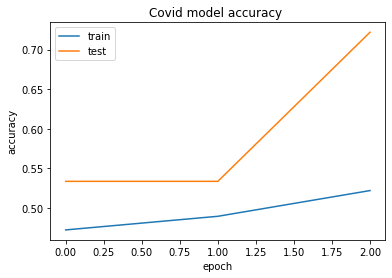

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Covid model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred=model.predict(test_generator)
y_true = test_generator.classes
y_pred=np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

45/45 [==============================] - 5s 103ms/step
0.4663677130044843
0.3180428134556575


In [29]:
class_label=list(train_generator.class_indices.keys())
print(classification_report(y_true,y_pred,target_names=class_label))

              precision    recall  f1-score   support

    CT_COVID       0.47      1.00      0.64       104
 CT_NonCOVID       0.00      0.00      0.00       119

    accuracy                           0.47       223
   macro avg       0.23      0.50      0.32       223
weighted avg       0.22      0.47      0.30       223



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
